## Introduction to library

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Imported the reqired libarryes
#### numpy 
contents the all mathamatical tools for the performing operation effectively
#### matplotlib
This library provides the varois graphs and the charts to represent and visualize the data.
#### Pandas
This library used for the import data sets and manages the data sets.

In [19]:
dataset = pd.read_csv("""/Users/rajanikant/Documents/Training/Machine-Learning/Machine Learning A-Z Template Folder/Part 1 - Data Preprocessing/Data_Preprocessing/Data.csv""")
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [20]:
X = dataset.iloc[:,:-1].values
# Retrive the all values from the data set expected last column

In [21]:
# Printing the all data in the console
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [22]:
Y = dataset.iloc[:, 3].values
# Represent the third column only

In [23]:
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

### Replacing the missing values using "Mean"

In [24]:
# This library used for the preprocessing the data.
from sklearn.preprocessing import Imputer


In [25]:
# careating the object of the Imputer class
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# Missing value represent which values we have to replace
# Strategy represents what we have going to compute like mean, mode, median
# axis represents the 0 for column and 1 for row
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [26]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### Encoding the categorical data

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lable_encoder_X = LabelEncoder()
X[:,0] = lable_encoder_X.fit_transform(X[:,0])
# Encoded the first column that have the categorical data.

In [28]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [29]:
#  But this will causes the problem of the importance. Every value is considerd in the formulas so we have 
# Devide the first column in to three columns to idntify the values accurately. so we can get 3 column as spain, france and Germany


In [30]:
# OneHot Encoder is seperate the categorical values into the columns
onehot = OneHotEncoder(categorical_features= [0] )
X = onehot.fit_transform(X).toarray()
# print(X_train)
# X_train_1 = onehot.fit_transform(X_train)

In [31]:
X.astype(int)

array([[    1,     0,     0,    44, 72000],
       [    0,     0,     1,    27, 48000],
       [    0,     1,     0,    30, 54000],
       [    0,     0,     1,    38, 61000],
       [    0,     1,     0,    40, 63777],
       [    1,     0,     0,    35, 58000],
       [    0,     0,     1,    38, 52000],
       [    1,     0,     0,    48, 79000],
       [    0,     1,     0,    50, 83000],
       [    1,     0,     0,    37, 67000]])

In [32]:
# Lable encoder for the y axis
lable_encoder_y  = LabelEncoder()
Y = lable_encoder_y.fit_transform(Y)
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Spiliting data set into Training and Testing

In [69]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [70]:
x_train.astype(int)

array([[    0,     1,     0,    40, 63777],
       [    1,     0,     0,    37, 67000],
       [    0,     0,     1,    27, 48000],
       [    0,     0,     1,    38, 52000],
       [    1,     0,     0,    48, 79000],
       [    0,     0,     1,    38, 61000],
       [    1,     0,     0,    44, 72000],
       [    1,     0,     0,    35, 58000]])

In [71]:
x_test.astype(int)

array([[    0,     1,     0,    30, 54000],
       [    0,     1,     0,    50, 83000]])

In [72]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 1])

In [73]:
y_test

array([0, 0])

## Feature Scalling

The Ucledian distance betweent the two fearure will get higher then algorithm get issues to calculating the distance then. So feature Scalling will give the the feature normalization between 0 to 1. diagram will present the problem statement.

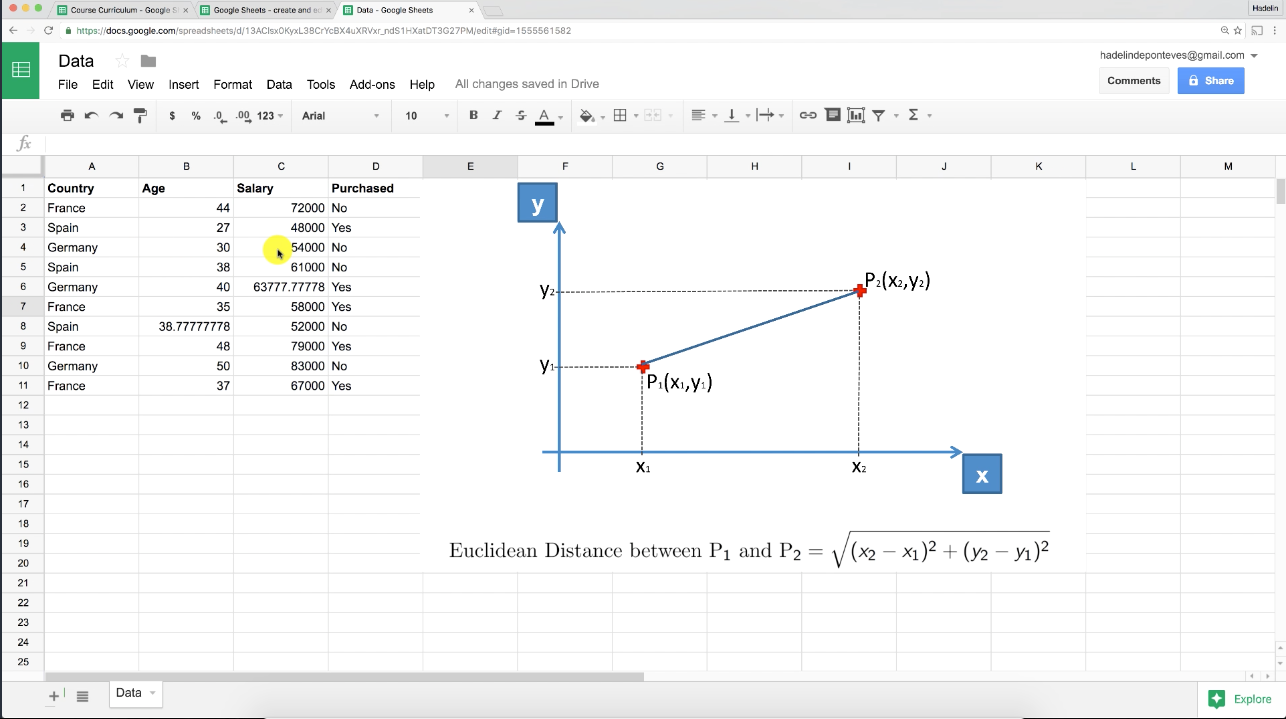

## Solution

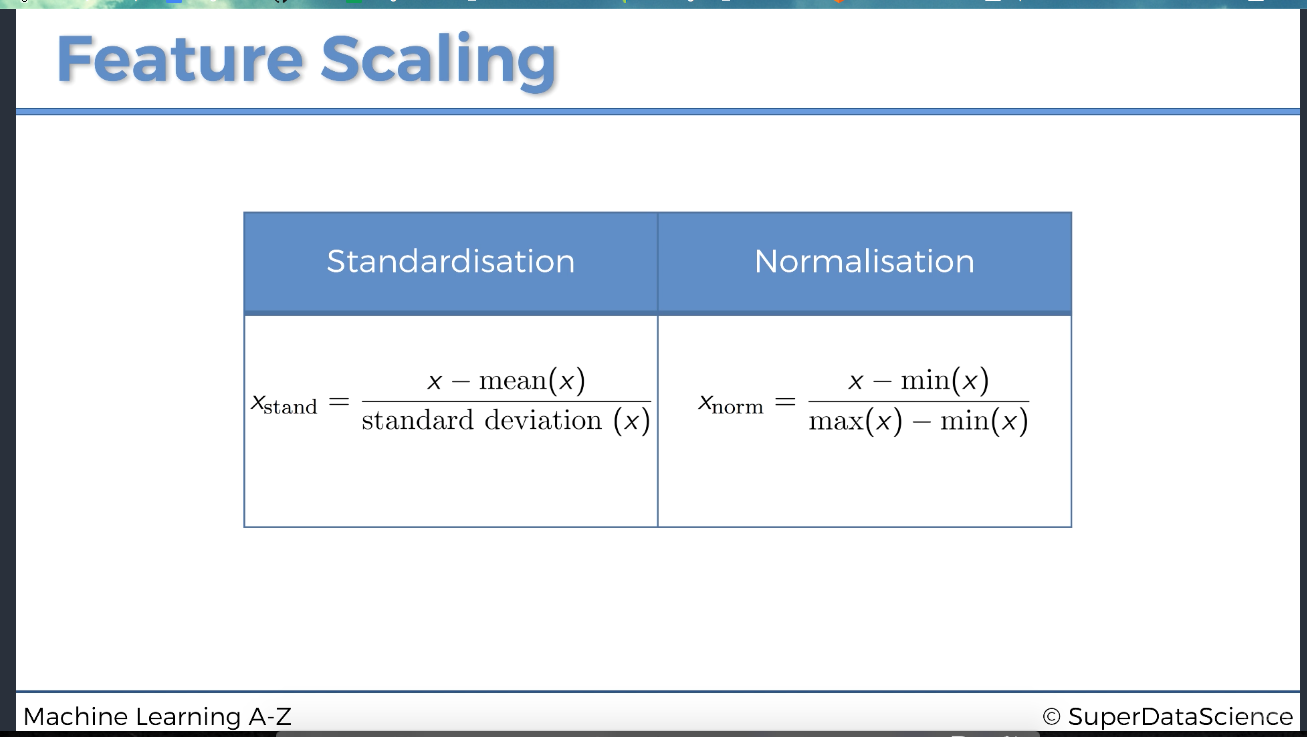

In [74]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [76]:
x_train

array([[-1.        ,  2.64575131, -0.77459667,  0.26306757,  0.12381479],
       [ 1.        , -0.37796447, -0.77459667, -0.25350148,  0.46175632],
       [-1.        , -0.37796447,  1.29099445, -1.97539832, -1.53093341],
       [-1.        , -0.37796447,  1.29099445,  0.05261351, -1.11141978],
       [ 1.        , -0.37796447, -0.77459667,  1.64058505,  1.7202972 ],
       [-1.        , -0.37796447,  1.29099445, -0.0813118 , -0.16751412],
       [ 1.        , -0.37796447, -0.77459667,  0.95182631,  0.98614835],
       [ 1.        , -0.37796447, -0.77459667, -0.59788085, -0.48214934]])

In [75]:
x_test

array([[-1.        ,  2.64575131, -0.77459667, -1.45882927, -0.90166297],
       [-1.        ,  2.64575131, -0.77459667,  1.98496442,  2.13981082]])